In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm

norm = mpl.colors.Normalize(vmin=0, vmax=8)
cmap = cm.rainbow

m = cm.ScalarMappable(norm=norm, cmap=cmap)

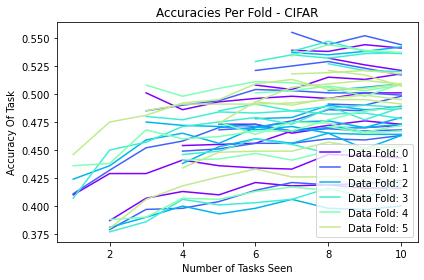

In [2]:
n_shifts = 6


for shift in range(n_shifts):
    df_of_split = pickle.load(open('shift_{}.p'.format(shift), 'rb'), encoding = 'latin1')[0]
    #df_of_split = pickle.load(open('../../cifar_exp/result/LF_10__{}.pickle'.format(shift + 1), 'rb'), encoding = 'latin1')[0]
    for task_num in range(1, 11):
        df_of_split_of_task = df_of_split[df_of_split['task'] == task_num]
        if task_num < 9:
            if task_num == 1:
                plt.plot(range(task_num, 11), 
                         np.array(df_of_split_of_task['accuracy']),
                         c = m.to_rgba(shift),
                         label = "Data Fold: {}".format(shift)
                        )
            else:
                plt.plot(range(task_num, 11), 
                         np.array(df_of_split_of_task['accuracy']),
                         c = m.to_rgba(shift)
                        )
    plt.title("Accuracies Per Fold - CIFAR")
    plt.ylabel("Accuracy Of Task")
    plt.xlabel("Number of Tasks Seen")
    plt.tight_layout()
    plt.legend(loc = "lower right")

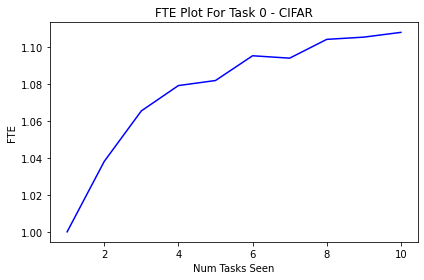

In [3]:
FTE_across_shifts = []
for shift in range(n_shifts):
    pkl_tuple = pickle.load(open('shift_{}.p'.format(shift), 'rb'), encoding = 'latin1')
    df_of_split = pkl_tuple[0]
    single_task_error = 1 - float(pkl_tuple[1][pkl_tuple[1]['task'] == 1]['accuracy'])
    forward_accuracies = df_of_split[(df_of_split['task'] == 1)]['accuracy']
    FTE_across_shifts.append(single_task_error / (1 - forward_accuracies))

plt.title("FTE Plot For Task 0 - CIFAR")
plt.ylabel("FTE")
plt.xlabel("Num Tasks Seen")
plt.plot(range(1, 11), np.mean(FTE_across_shifts, axis = 0), c = 'b')
plt.tight_layout()
plt.show()



[1.         1.03808367 1.06540938 1.07913103 1.08185404 1.09525151
 1.09395807 1.10412021 1.10533397 1.10790719]
1
[1.         1.0233399  1.04227921 1.04186798 1.05438384 1.05776577
 1.05724204 1.05545695 1.05961274]
2
[1.         0.99351176 1.00132086 1.00649224 1.00837494 1.00384438
 1.00287102 1.00290246]
3
[1.         1.01091654 1.02021399 1.01901385 1.02726887 1.02435983
 1.02877083]
4
[1.         1.00478894 1.0034049  1.01221269 1.00657314 1.01541333]
5
[1.         1.00758651 1.01768579 1.01467813 1.01568367]
6
[1.         1.00221467 1.00392367 0.99888678]
7
[1.         0.99323854 0.99211901]
8
[1.        1.0004954]
9
[1.]
10


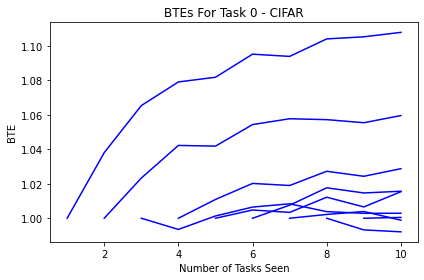

In [19]:
n_shifts = 6

btes_across_tasks_across_shifts = [[] for _ in range(n_shifts)]

for task in range(1, 11):
    btes_across_shifts = []
    for shift in range(n_shifts):
        pkl_tuple = pickle.load(open('shift_{}.p'.format(shift), 'rb'), encoding = 'latin1')
        df_of_split = pkl_tuple[0]
        df_of_split_of_task = df_of_split[df_of_split['task'] == task]
        single_task_error = 1 - float(df_of_split_of_task[df_of_split_of_task['base_task'] == task]['accuracy'])
        btes_across_shifts.append(single_task_error / (np.array((1 - df_of_split_of_task['accuracy']))))
    print(np.mean(btes_across_shifts, axis = 0))
    print(task)
    plt.plot(range(task, 11), np.mean(btes_across_shifts, axis = 0), c = 'b')
        
    
plt.title("BTEs For Task 0 - CIFAR")
plt.ylabel("BTE")
plt.xlabel("Number of Tasks Seen")
plt.tight_layout()
plt.show()